***PROJET ML***


In [3]:
!pip install ydata_profiling

In [4]:
# Pour la manipulation de données
import pandas as pd
import numpy as np
# Pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit-learn Pour la modélisation et l'évaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# 1.train_test_split : Séparation de donnée en ensemble d'entrainement et de test
# 2. GridSearchCV : Recherche des meilleurs hyperparamètres
# 3. RandomizedSearchCV : Recherche d’hyperparamètres aléatoire
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# 1. StandardScaler : Mise à l'échelle des données
# 2. LabelEncoder : Encodage des variables catégorielles
# 3. OneHotEncoder : Encodage de variables catégorielles
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
# 1. accuracy_score : Mesure de la précision
# 2. confusion_matrix : Matrice de confusion
# 3. classification_report : Rapport complet des métriques
# 4. f1_score : Score F1
# 5. roc_auc_score : Courbe ROC et AUC pour les classifications binaires
from sklearn.linear_model import LogisticRegression
# LogisticRegression : Modèle de régression logistique
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier : Classificateur par forêts aléatoires
from sklearn.neighbors import KNeighborsClassifier
# KNeighborsClassifier : Classificateur K-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier : Classificateur Arbre de Décision

from pathlib import Path
from ydata_profiling import ProfileReport

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from IPython.display import display
import pandas._typing
import os
import pickle

***Ouverture du DataSet***

In [5]:
churn = pd.read_csv('Customer_churn.csv')
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


***Analyse de la DataFrame EDA***

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


On a des colonnes comme RowNumber, CustomerId et Surname qui ne nous sont pas utile pour notre modèle on va donc supprimer ces dernières

In [7]:
churn = churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


On note :
- que le CreditScore va de 350 à 850 avec une ***moyenne d'environ 650***
- que la clientèle couvre une tranche d'age assez grande (de 18 à 92 ans) et qu'on a une ***moyenne d'age d'environ 39 ans***
- que l'ancienneté des clients est en ***moyenne de 5 ans***, même si on note que certains on une ancienneté inférieure a un an
- que le solde va de 0 à 250898, la ***moyenne étant d'environ 62397***. À noter les clients avec un solde a 0 est a surveiller possiblement des clients qui vont vouloir nous quitter
- que le nombre de produits détenu par client varie entre 1 et 4, la ***moyenne des clients détenant entre 1 et 2 produits***
- que certains clients ne possèdent pas de carte de crédit
- que ***51% des clients sont actifs***
- que le salaire estimé des clients varie énomément (entre 11,58 et 199992,48)
- que le ***churn est de 20%***

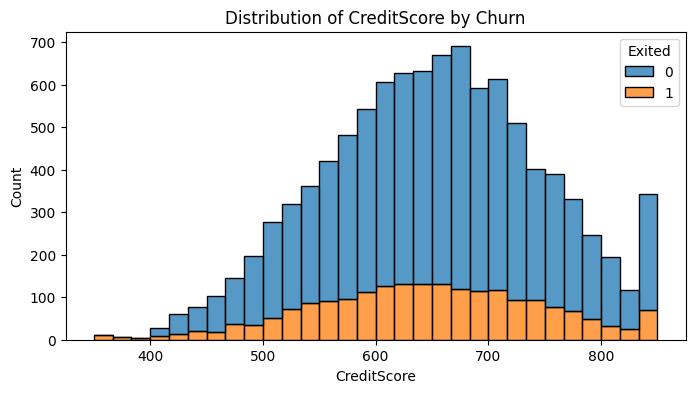

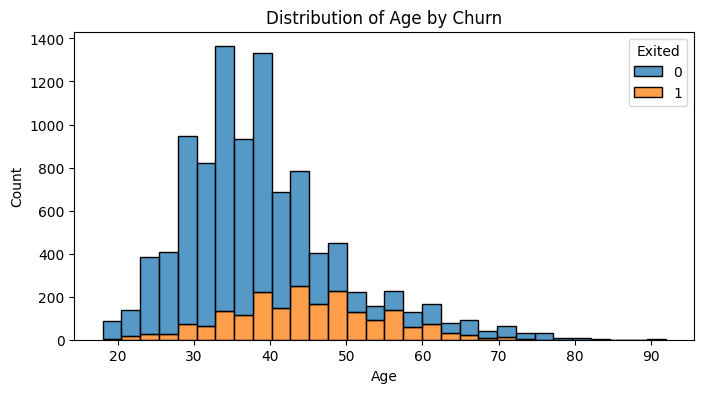

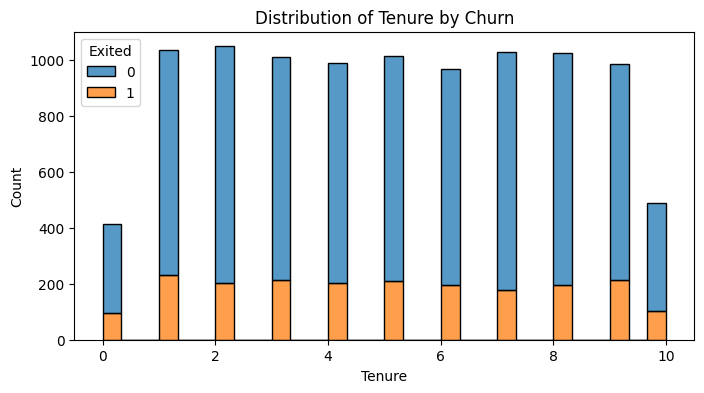

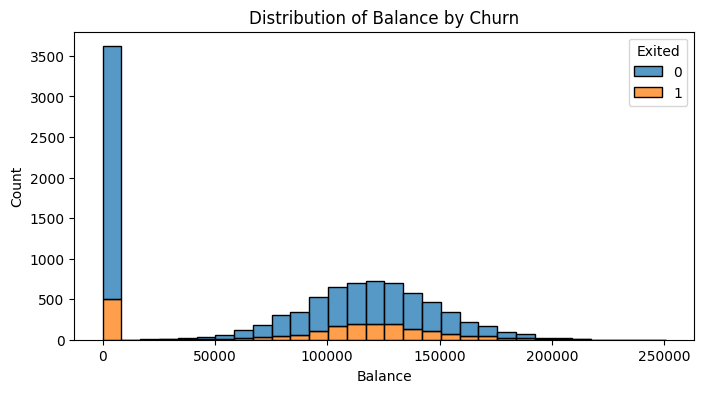

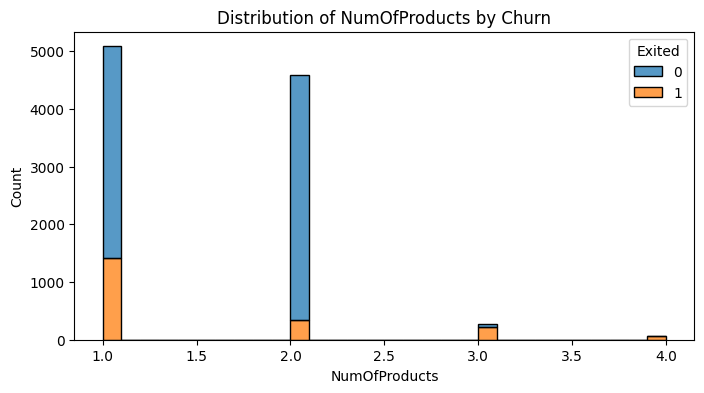

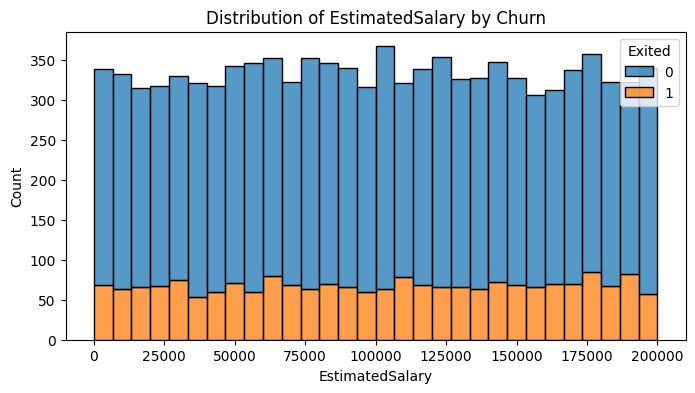

In [10]:
# Visualisation des variables numériques
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=churn, x=col, hue='Exited', multiple='stack', bins=30)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

On note que :
- Une part très importante du churn provient des comptes qui ne possedaient pas d'argent dessus (1er indicateur qu'on voit)
- Une part très importante du churn provient des comptes qui ne possedaient qu'un produit (2e indicateur qu'on voit + parlant que le premier)
- La répartition du churn par part de salaire estimé n'est pas très parlant car a peut près égale, pareil pour l'ancienneté

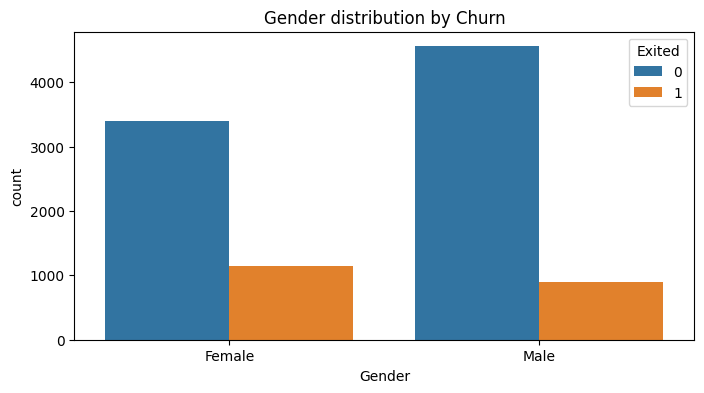

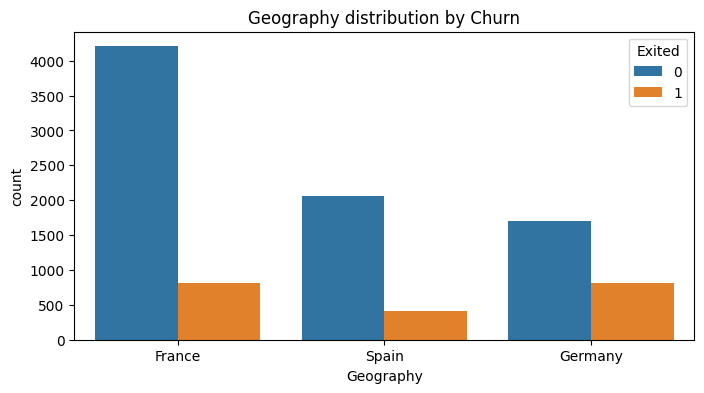

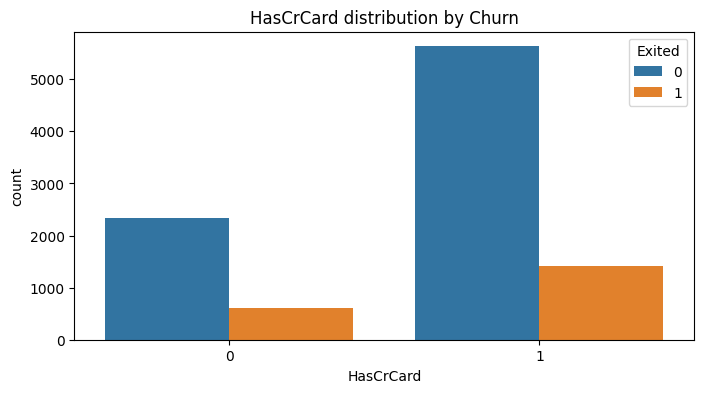

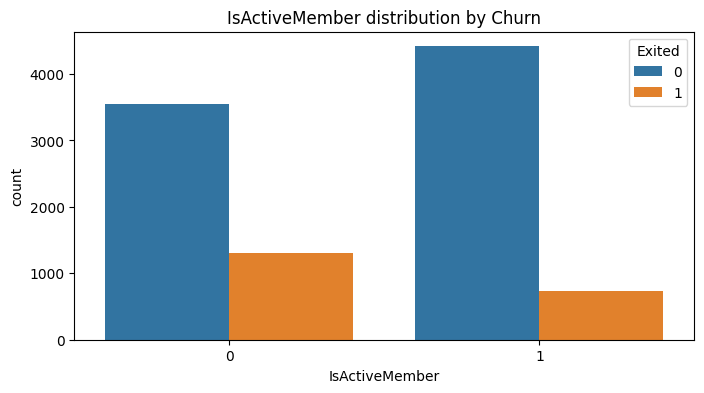

In [11]:
# Visualisation des variables catégorielles
categorical_columns = ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=churn, x=col, hue='Exited')
    plt.title(f'{col} distribution by Churn')
    plt.show()


commentaires...

In [12]:
def exercise1(df: pd.DataFrame, output_path: Path) -> None:

    ProfileReport(df).to_file(output_path)
# Importation du fichier sur mon espace personnel (bug sinon)
PROFILE_REPORT_PATH = Path(os.path.expanduser("~/churn_profile.html"))
# Suppression de l'ancien profil report
if PROFILE_REPORT_PATH.exists():
    PROFILE_REPORT_PATH.unlink(missing_ok=True)
    print("Rapport de profilage existant supprimé")

exercise1(churn, PROFILE_REPORT_PATH)

if not PROFILE_REPORT_PATH.exists():
    raise Exception(f"Le rapport de profilage n'a pas été généré à l'emplacement : {PROFILE_REPORT_PATH}")

print(f"Rapport de profilage généré avec succès à l'emplacement : {PROFILE_REPORT_PATH}")

Rapport de profilage existant supprimé


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 481.94it/s]

Rapport de profilage généré avec succès à l'emplacement : /Users/hadjirariad/churn_profile.html


Nous avons généré un profiling report dans le but d'avoir une analyse plus approfondie du DataSet

***Modélisation du modèle Baseline***

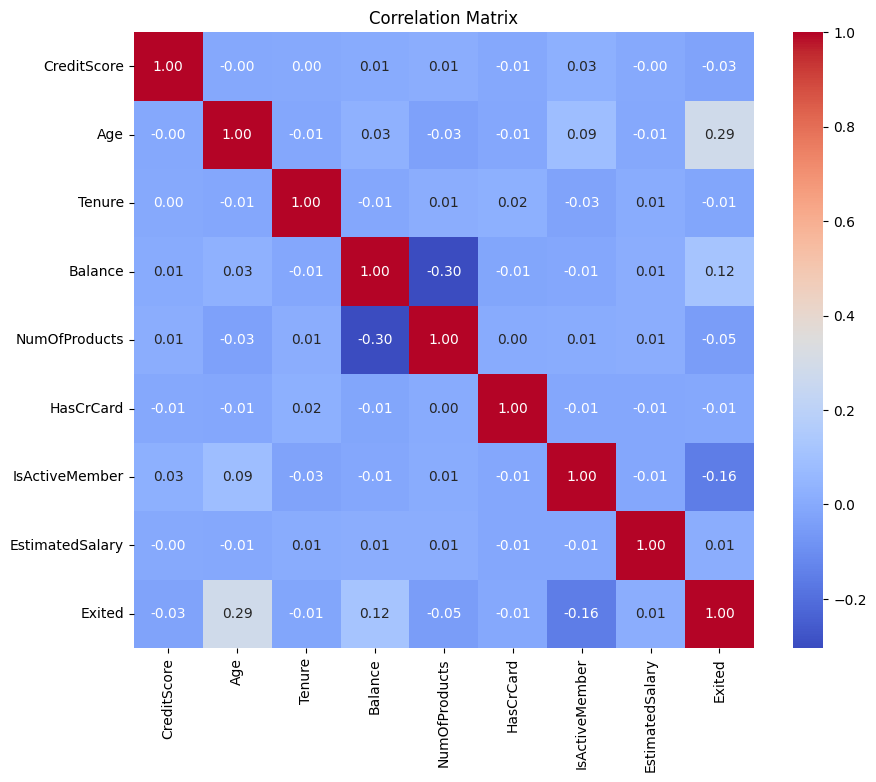

In [13]:
# Uniquement les colonnes numériques
numeric_columns = churn.select_dtypes(include=[np.number])

# Matrice de corrélation
plt.figure(figsize=(10, 8))
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


On a rajouté cette étape car on n'arrivait pas a générer la matrice de corrélation avec les variables numériques et catégorielles en une seule fois

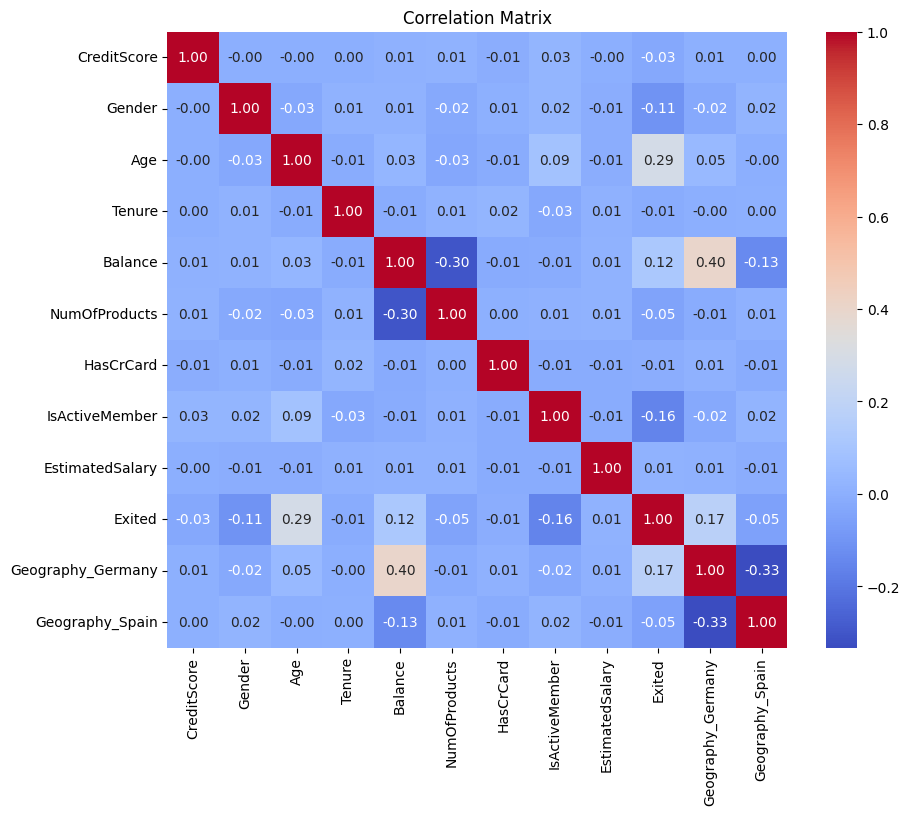

In [14]:
# Encoder les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Label encoding pour Gender et Geography
churn['Gender'] = LabelEncoder().fit_transform(churn['Gender'])
churn = pd.get_dummies(churn, columns=['Geography'], drop_first=True)

# Recalcule de la matrice de corrélation avec les variables catégorielles inclus
plt.figure(figsize=(10, 8))
corr_matrix = churn.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


On peut voir que :

- La corrélation entre <u>l'âge</u> et <u>Exited</u> est de ***0.29***, ce qui suggère que l'âge a une certaine importance pour prédire le churn. Les clients plus âgés pourraient être plus susceptibles de quitter le service.
- La corrélation entre <u>IsActiveMember</u> et <u>Exited</u> est négative (***-0.16***), ce qui indique que les membres actifs sont moins susceptibles de quitter.
- Une corrélation positive de ***0.12*** entre le solde (<u>Balance</u>) et le <u>churn</u>. Cela pourrait signifier que les clients avec des soldes élevés peuvent avoir un risque légèrement plus élevé de churn.
- Il y a une corrélation négative de ***-0.11*** entre <u>Gender</u> et <u>Exited</u>, ce qui suggère que le genre peut avoir un impact sur le churn, avec peut-être un groupe plus à risque de churn.
- <u>Geography_Germany</u> a une corrélation positive de ***0.17*** avec le <u>churn</u>. Cela pourrait indiquer que les clients en Allemagne sont plus susceptibles de churn que dans les autres pays.
- <u>Geography_Spain</u> a une corrélation négative de ***-0.05*** avec le <u>churn</u>, ce qui pourrait signifier que les clients en Espagne sont légèrement moins susceptibles de quitter.

- Il y a une corrélation assez forte (***0.40***) entre <u>Balance</u> et <u>Geography_Germany</u>, ce qui pourrait signifier que les clients allemands ont tendance à avoir des soldes plus élevés.
- La plupart des autres variables, comme CreditScore, Tenure, NumOfProducts, ont des corrélations très faibles avec Exited, ce qui signifie qu'elles pourraient ne pas avoir un fort impact direct sur le churn.

Après relecture nous voyons surtout qu'il n'y a pas de très fort lien de corrélation entre les différentes variables et le churn ce qui expliquer le fait que le modèle de prédiction LogisticRegression que nous avions choisi au départ n'était pas adapté

In [15]:
# Séparer les features et la variable cible
X = churn.drop(columns=['Exited'])
y = churn['Exited']

# Séparer en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Créer et entraîner le modèle
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Afficher les performances du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.58      0.21      0.31       393

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000



/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# cross validation logreg model
cv_results_acc = []
cv_score = cross_val_score(logreg, X_train, y_train, scoring = "f1", cv = 4)
cv_results_acc.append(cv_score.mean()*100)
print("%s: %f" % ('log reg', cv_score.mean()*100))

/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

log reg: 31.501388


/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

- Accuracy : 0.815 (81.5%) : Cela signifie que ton modèle prédit correctement 81.5 % des cas. L'accuracy seule peut être trompeuse, surtout en présence de classes déséquilibrées (ici, 0 vs 1).
            Analyse des clients qui ne churnent pas (0) :

- Precision : 0.83 : Parmi tous les clients que ton modèle a prédits comme ne churnant pas, 83 % étaient corrects.
- Recall : 0.96 : Ton modèle a capturé 96 % des clients qui n'ont effectivement pas churné.
- F1-score : 0.89 : Le F1-score est élevé, ce qui signifie que ton modèle gère bien cette classe.
            Analyse des clients qui churnent (1) :

- Precision  : 0.58 : Parmi tous les clients prédits comme churnant, seulement 58 % étaient corrects. Cela signifie que ton modèle a un taux de faux positifs relativement élevé pour cette classe.
- Recall : 0.21 : C'est assez faible. Cela signifie que ton modèle n'arrive pas à capturer correctement les clients qui churnent. Il en rate beaucoup.
- F1-score : 0.31 : Cela montre que le modèle peine à prédire correctement cette classe.

- Macro avg : Moyenne non pondérée des scores des deux classes. Ici, tu vois que le rappel global est faible (0.59), indiquant un problème avec la classe minoritaire.
- Weighted avg : Moyenne pondérée en fonction du nombre de cas dans chaque classe. Elle est plus proche des scores de la classe majoritaire car la majorité des clients ne churnent pas.

Le modèle est biaisé vers la classe majoritaire (les clients qui ne churnent pas). Il a donc du mal à identifier les clients churners



In [18]:
# Augmenter le nombre d'itération de 1000 à 3000
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Afficher les performances du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.811
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.22      0.31       393

    accuracy                           0.81      2000
   macro avg       0.69      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000



/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9254,686,1,32,6,0.00,2,1,1,179093.26,False,False
1561,632,1,42,4,119624.60,2,1,1,195978.86,True,False
1670,559,1,24,3,114739.92,1,1,0,85891.02,False,True
6087,561,0,27,9,135637.00,1,1,0,153080.40,False,False
6669,517,1,56,9,142147.32,1,0,0,39488.04,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,1,54,8,69712.74,1,1,1,69381.05,False,False
5191,682,0,58,1,0.00,1,1,1,706.50,False,False
5390,735,0,38,1,0.00,3,0,0,92220.12,False,False
860,667,1,43,8,190227.46,1,1,0,97508.04,False,False


In [20]:
# Augmenter le nombre d'itération de 3000 à 5000
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Afficher les performances du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8145
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.22      0.31       393

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000



/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dans notre cas on a un déséquilibre entre les classes (la classe 0 est surreprésenté), le modèle de regression logistique se retrouve donc a sous performer
On va tenter de changer et d'aller vers un RandomForest pour voir si le modèle est plus performant ou non

In [21]:
churn
# On affiche le DataSet pour vérifier qu'on a pas effectuer de transformation

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [24]:
# cross validation random forest
cv_results_acc = []
cv_score = cross_val_score(model, X_train, y_train, scoring = "f1", cv = 4)
cv_results_acc.append(cv_score.mean()*100)
print("%s: %f" % ('random forest', cv_score.mean()*100))

random forest: 57.706064


Accuracy: 0.867
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



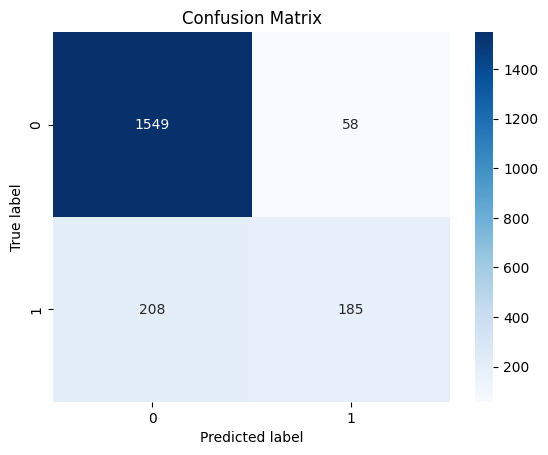

In [25]:
# Évaluer la performance du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


On note que :
- Il y a une augmentation de l'accuracy entre les deux modèles : on passe de 81% à 87%
- Pour la classe 0 on a des prédictions qui sont assez bonnes
        Precision : 0,88
        Recall : 0,96
        F1-score : 0,92
- Pour la classe 1 on a une amélioration des prédictions
        Precision : 0,76 (pour 0,55 avant)
        Recall : 0,47 (pour 0,22 avant)
        F1-score : 0,58 (pour 0,31 avant)
Le modèle a une performance qui est limité du aux erreurs faites dans la classe 1 (beaucoup de faux négatifs)


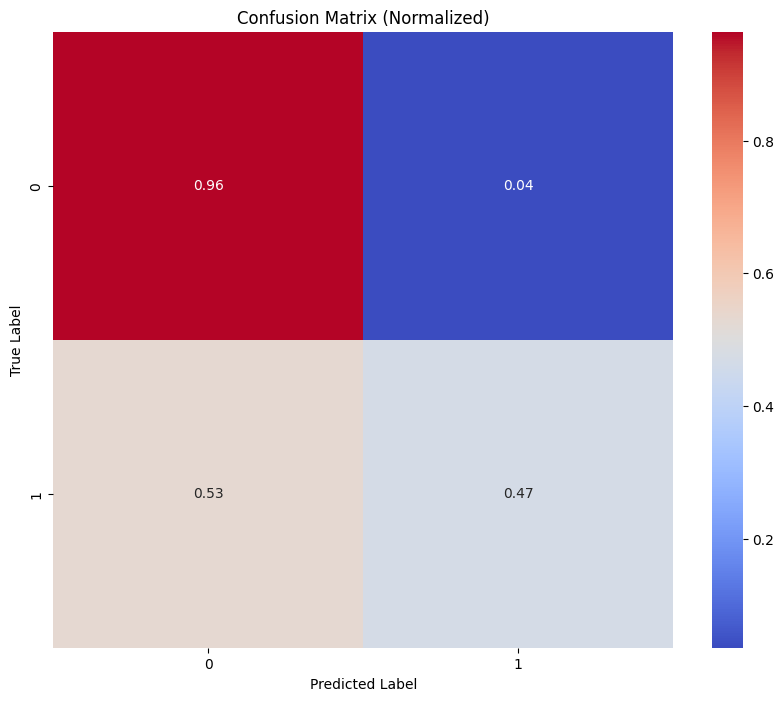

In [26]:
# Afficher la Confusion Matrix avec des décimaux et non en nombre absolu
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Confusion Matrix (Normalized)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


La matrice de confusion nous confirme bien qu'on a un taux de faux négatif assez élevé (53%), alors que notre taux de faux positif est bas (4%)
Il peut donc être intéréssant d'essayer de faire un rééchantillonage, rééquilibrer les classes, d'ajuster le seuil de décision ou encore d'optimiser les hyperparamètres.

Teste rééquilibrage des classe avec class_weight="balanced"

In [27]:
RandomForestmodel = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
RandomForestmodel.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred = RandomForestmodel.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy: 0.867
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



Ça n'a pas améliorer la précision le modèle, on va donc essayer avec SMOTE

In [28]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
# Appliquer SMOTE pour rééquilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entraîner le modèle RandomForest sur les données rééchantillonnées
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train_resampled, y_train_resampled)

# Prédire et évaluer
print("Accuracy:", accuracy_score(y_test, y_pred))
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))


Accuracy: 0.8685
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.56      0.65      0.60       393

    accuracy                           0.83      2000
   macro avg       0.73      0.76      0.75      2000
weighted avg       0.84      0.83      0.83      2000



Nous pouvons noter qu'ici nous avons une nette amélioration du recall, on peut maintenant tenter de jouer sur le seuil de décision ou les hyperparamètres afin d'affiner notre modèle

In [31]:
# Prédire les probabilités pour la classe 1 (churn)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Ajuster le seuil à 0,4
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Évaluer les performances après ajustement du seuil
from sklearn.metrics import classification_report, accuracy_score

# Afficher le rapport de classification
print(f'Accuracy:',accuracy_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))


Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.64      0.57      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000



In [32]:
# Prédire les probabilités pour la classe 1 (churn)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Ajuster le seuil à 0,3
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Évaluer les performances après ajustement du seuil
from sklearn.metrics import classification_report, accuracy_score

# Afficher le rapport de classification
print(f'Accuracy:',accuracy_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

Accuracy: 0.828
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1607
           1       0.55      0.69      0.61       393

    accuracy                           0.83      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.85      0.83      0.83      2000



Avec un seuil de décision de 0,3 même si l'accuracy baisse on a une prédiction qui s'améliore légèrement avec une légère augmentation du recall et du f1-score
(la baisse de l'accuracy signifie aussi l'augmentation des faux positif)

ML FLow

In [33]:
pip install mlflow

  Using cached mlflow-2.17.0-py3-none-any.whl.metadata (29 kB)
  Using cached mlflow_skinny-2.17.0-py3-none-any.whl.metadata (30 kB)
  Using cached alembic-1.13.3-py3-none-any.whl.metadata (7.4 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached cloudpickle-3.1.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached opentelemetry_api-1.27.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached opentelemetry_sdk-1.27.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached sqlparse-0.5.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached Mako-1.3.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached graphql_core-3.2.5-py3-none-any.whl.metadata (10 kB)
  Using cached graphql_relay-3.2.0-py3-none-any.whl.metadata (12 kB)
  Using cached google_auth-2.35.0-py2.py3-none-any.whl.metadat

ML Flow avec 10 arbres

In [ ]:
mlflow.set_tracking_uri(uri="http://0.0.0.0:8000")
mlflow.set_experiment("ML Flow demo with Churn dataset")

with mlflow.start_run():
    #donne a with 2 fonctions, ouvre un contexte qui permet d'accumuler de l'information
    mlflow.set_tag("Training Info", "RandomForest model for churn data")

    hyper_params = {
        "n_estimators": 10,
        "max_depth": 5
    }
    
    # Enregistrer les hyperparamètres dans MLflow
    mlflow.log_params(hyper_params)
    
    # Exemple d'entraînement du modèle
    model = RandomForestClassifier(n_estimators=hyper_params['n_estimators'], max_depth=hyper_params['max_depth'])
    model.fit(X_train, y_train) 
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)  
    
    # Enregistrer le modèle
    mlflow.sklearn.log_model(model, "RandomForest_Model")

    # Calculer le F1_Score et l'enregistrer dans MLflow
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score (y_test, y_pred)  
    mlflow.log_metric("accuracy", accuracy)

In [ ]:
mlflow.set_tracking_uri(uri="http://0.0.0.0:8000")
mlflow.set_experiment("ML Flow demo with Churn dataset")

with mlflow.start_run():
    #donne a with 2 fonctions, ouvre un contexte qui permet d'accumuler de l'information
    mlflow.set_tag("Training Info", "RandomForest model for churn data")

    hyper_params = {
        "n_estimators": 10,
        "max_depth": 5
    }
    
    # Enregistrer les hyperparamètres dans MLflow
    mlflow.log_params(hyper_params)
    
    # Exemple d'entraînement du modèle
    model = RandomForestClassifier(n_estimators=hyper_params['n_estimators'], max_depth=hyper_params['max_depth'])
    model.fit(X_train, y_train) 
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)  
    
    # Enregistrer le modèle
    mlflow.sklearn.log_model(model, "RandomForest_Model")

    # Calculer le F1_Score et l'enregistrer dans MLflow
    from sklearn.metrics import f1_score
    f1_score = f1_score(y_test, y_pred)  
    mlflow.log_metric("F1_Score", f1_score)

ML Flow avec 100 arbres

In [ ]:
mlflow.set_tracking_uri(uri="http://0.0.0.0:8000")
mlflow.set_experiment("ML Flow demo with Churn dataset")

with mlflow.start_run():
    #donne a with 2 fonctions, ouvre un contexte qui permet d'accumuler de l'information
    mlflow.set_tag("Training Info", "RandomForest model for churn data")

    hyper_params = {
        "n_estimators": 100,
        "max_depth": 5
    }
    
    # Enregistrer les hyperparamètres dans MLflow
    mlflow.log_params(hyper_params)
    
    # Exemple d'entraînement du modèle
    model = RandomForestClassifier(n_estimators=hyper_params['n_estimators'], max_depth=hyper_params['max_depth'])
    model.fit(X_train, y_train) 
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)  
    
    # Enregistrer le modèle
    mlflow.sklearn.log_model(model, "RandomForest_Model")

    # Calculer le F1_Score et l'enregistrer dans MLflow
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score (y_test, y_pred)  
    mlflow.log_metric("accuracy", accuracy)

In [ ]:
mlflow.set_tracking_uri(uri="http://0.0.0.0:8000")
mlflow.set_experiment("ML Flow demo with Churn dataset")

with mlflow.start_run():
    #donne a with 2 fonctions, ouvre un contexte qui permet d'accumuler de l'information
    mlflow.set_tag("Training Info", "RandomForest model for churn data")

    hyper_params = {
        "n_estimators": 100,
        "max_depth": 5
    }
    
    # Enregistrer les hyperparamètres dans MLflow
    mlflow.log_params(hyper_params)
    
    # Exemple d'entraînement du modèle
    model = RandomForestClassifier(n_estimators=hyper_params['n_estimators'], max_depth=hyper_params['max_depth'])
    model.fit(X_train, y_train) 
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)  
    
    # Enregistrer le modèle
    mlflow.sklearn.log_model(model, "RandomForest_Model")

    # Calculer le F1_Score et l'enregistrer dans MLflow
    from sklearn.metrics import f1_score
    f1_score = f1_score(y_test, y_pred)  
    mlflow.log_metric("F1_Score", f1_score)

Sans hyper paramètre

In [ ]:
mlflow.set_tracking_uri(uri="http://0.0.0.0:8000")
mlflow.set_experiment("ML Flow demo with Churn dataset")

with mlflow.start_run():
    #donne a with 2 fonctions, ouvre un contexte qui permet d'accumuler de l'information
    mlflow.set_tag("Training Info", "RandomForest model for churn data")

    hyper_params = {
    }
    
    # Enregistrer les hyperparamètres dans MLflow
    mlflow.log_params(hyper_params)
    
    # Exemple d'entraînement du modèle
    model = RandomForestClassifier(**hyper_params)
    model.fit(X_train, y_train) 
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)  
    
    # Enregistrer le modèle
    mlflow.sklearn.log_model(model, "RandomForest_Model")

    # Calculer le F1_Score et l'enregistrer dans MLflow
    from sklearn.metrics import f1_score
    f1_score = f1_score(y_test, y_pred)  
    mlflow.log_metric("F1_Score", f1_score)
print (f1_score)

In [ ]:
mlflow.set_tracking_uri(uri="http://0.0.0.0:8000")
mlflow.set_experiment("ML Flow demo with Churn dataset")

with mlflow.start_run():
    #donne a with 2 fonctions, ouvre un contexte qui permet d'accumuler de l'information
    mlflow.set_tag("Training Info", "RandomForest model for churn data")

    hyper_params = {
    }
    
    # Enregistrer les hyperparamètres dans MLflow
    mlflow.log_params(hyper_params)
    
    # Exemple d'entraînement du modèle
    model = RandomForestClassifier(**hyper_params)
    model.fit(X_train, y_train) 
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)  
    
    # Enregistrer le modèle
    mlflow.sklearn.log_model(model, "RandomForest_Model")

    # Calculer le F1_Score et l'enregistrer dans MLflow
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score (y_test, y_pred)  
    mlflow.log_metric("accuracy", accuracy)
print (accuracy)